# **0. Install/import dependendcies**

In [1]:
"""install libraries"""
!pip install gym gym[atari]
!pip install opencv-python
!pip install shimmy>=0.2.1

  Using cached gym-0.26.2.tar.gz (721 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
                                              0.0/14.8 MB ? eta -:--:--
                                              0.0/14.8 MB ? eta -:--:--
                                             0.0/14.8 MB 495.5 kB/s eta 0:00:30
                                              0.2/14.8 MB 1.4 MB/s eta 0:00:11
     -                                        0.5/14.8 MB 3.3 MB/s eta 0:00:05
     --                                       0.9/14.8 MB 4.6 MB/s eta 0:00:04
     ---                                      1.4/14.8 MB 5.6 MB/s eta 0:00:03
     -----                                    1.9/14.8 MB 6.5 MB/s eta 0:00:02
     ----

In [3]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
                                              0.0/2.6 GB ? eta -:--:--
                                              0.0/2.6 GB 3.5 MB/s eta 0:12:32
                                              0.0/2.6 GB 5.8 MB/s eta 0:07:34
                                              0.0/2.6 GB 8.4 MB/s eta 0:05:12
                                              0.0/2.6 GB 11.1 MB/s eta 0:03:56
                                              0.0/2.6 GB 14.0 MB/s eta 0:03:08
                                              0.0/2.6 GB 11.2 MB/s eta 0:03:54
                                              0.0/2.6 GB 13.5 MB/s eta 0:03:15
                                              0.0/2.6 GB 12.8 MB/s eta 0:03:24
                                              0.0/2.6 GB 15.3 MB/s eta 0:02:51
                                              0.0/2.6 GB 16.1 MB/s eta 0:02:43
                                              0.0/2.6 GB 16.9 MB/s eta 0:02:35
    

In [4]:
!pip install "stable-baselines3[extra]>=2.0.0a4"

                                              0.0/178.0 kB ? eta -:--:--
     --                                       10.2/178.0 kB ? eta -:--:--
     ------                                30.7/178.0 kB 435.7 kB/s eta 0:00:01
     --------------------------             122.9/178.0 kB 1.0 MB/s eta 0:00:01
     -------------------------------------- 178.0/178.0 kB 1.3 MB/s eta 0:00:00
                                              0.0/10.7 MB ? eta -:--:--
     -                                        0.4/10.7 MB 8.9 MB/s eta 0:00:02
     ---                                      0.9/10.7 MB 9.7 MB/s eta 0:00:02
     ------                                   1.6/10.7 MB 11.6 MB/s eta 0:00:01
     --------                                 2.4/10.7 MB 12.6 MB/s eta 0:00:01
     ------------                             3.3/10.7 MB 13.9 MB/s eta 0:00:01
     ---------------                          4.1/10.7 MB 14.7 MB/s eta 0:00:01
     ------------------                       5.0/10.7 MB 15.2 

In [1]:
"""Import libraries"""
import gymnasium as gym
from gym import Env
import stable_baselines3
import numpy as np
import matplotlib.pyplot as plt
import random
import time
from IPython.display import clear_output
from time import sleep
from matplotlib import animation

# **1. Starting and exploring Pitfall environment**

In [2]:
env = gym.make("ALE/Pitfall-v5", render_mode="rgb_array").env

In [3]:
env.reset()

(array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 {'lives': 3, 'episode_frame_number': 0, 'frame_number': 0})

State space: Box(0, 255, (210, 160, 3), uint8)
Action space: Discrete(18)
Action space: ['NOOP', 'FIRE', 'UP', 'RIGHT', 'LEFT', 'DOWN', 'UPRIGHT', 'UPLEFT', 'DOWNRIGHT', 'DOWNLEFT', 'UPFIRE', 'RIGHTFIRE', 'LEFTFIRE', 'DOWNFIRE', 'UPRIGHTFIRE', 'UPLEFTFIRE', 'DOWNRIGHTFIRE', 'DOWNLEFTFIRE']
Action: 4
Reward: 0.0
State done :False
State info :{'lives': 3, 'episode_frame_number': 4, 'frame_number': 4}


D:\Programas\anaconda\envs\py310\lib\site-packages\gymnasium\utils\passive_env_checker.py:364: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


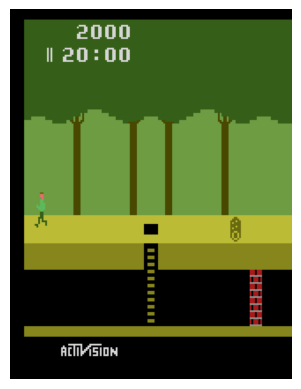

In [4]:
# Print dimensions of state and action space
print("State space: {}".format(env.observation_space))
print(f"Action space: {env.action_space}")
print(f"Action space: {env.unwrapped.get_action_meanings()}")

# Sample random action
action =env.action_space.sample()
print("Action: {}".format(action))
next_state, reward, done,_,info = env.step(action)

# Print output
print("Reward: {}".format(reward))
print(f"State done :{done}")
print(f"State info :{info}")

# Render and plot an environment frame
frame = env.render()
plt.imshow(frame)
plt.axis("off")
plt.show()

In [5]:
def run_animation(experience_buffer):
    """Function to run animation"""
    time_lag = 0.05  # Delay (in s) between frames
    for experience in experience_buffer:
        # Plot frame
        clear_output(wait=True)
        plt.imshow(experience['frame'])
        plt.axis('off')
        plt.show()

        
        print(f"Episode: {experience['episode']}/{experience_buffer[-1]['episode']}")
        print(f"Epoch: {experience['epoch']}/{experience_buffer[-1]['epoch']}")
        #print(f"State: {experience['state']}")
        print(f"Action: {experience['action']}")
        print(f"Reward: {experience['reward']}")
        # Pauze animation
        sleep(time_lag)

In [6]:
def store_episode_as_gif(experience_buffer, path='./', filename='animation.gif'):
    """Store episode as gif animation"""
    fps = 5   # Set framew per seconds
    dpi = 300  # Set dots per inch
    interval = 50  # Interval between frames (in ms)

    # Retrieve frames from experience buffer
    frames = []
    for experience in experience_buffer:
        frames.append(experience['frame'])

    # Fix frame size
    plt.figure(figsize=(frames[0].shape[1] / dpi, frames[0].shape[0] / dpi), dpi=dpi)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    # Generate animation
    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval=interval)

    # Save output as gif
    anim.save(path + filename, writer='imagemagick', fps=fps)

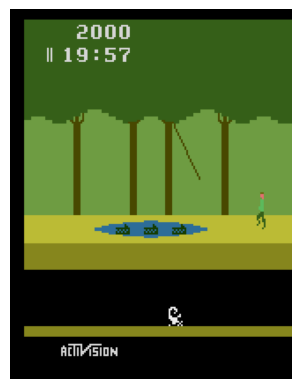

Episode: 1/1
Epoch: 49/49
Action: 17
Reward: 0.0
# epochs: 50
# failed drop-offs: 0


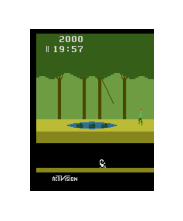

In [171]:
"""Simulation with random agent"""
epoch = 0
num_failed_dropoffs = 0
experience_buffer = []
cum_reward = 0

done = False

state = env.reset()

#while not done: ## full run - takes a long time
while epoch < 50:
    # Sample random action
    "Action selection without action mask"
    action = env.action_space.sample()

    "Action selection with action mask"
    #action = env.action_space.sample(env.action_mask(state))

    state, reward, done, _,info = env.step(action)
    cum_reward += reward

    # Store experience in dictionary
    experience_buffer.append({
        "frame": env.render(),
        "episode": 1,
        "epoch": epoch,
        "state": state,
        "action": action,
        "reward": cum_reward,
        }
    )

    if reward == -10:
        num_failed_dropoffs += 1

    epoch += 1

# Run animation and print console output
run_animation(experience_buffer)
store_episode_as_gif(experience_buffer)

print("# epochs: {}".format(epoch))
print("# failed drop-offs: {}".format(num_failed_dropoffs))


# **2. Trying existing models**

In [7]:
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
from gymnasium.wrappers import GrayScaleObservation
from stable_baselines3 import PPO
import torch
from stable_baselines3.common.callbacks import BaseCallback
import os

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

device = get_default_device()
print(device)

cuda


## **Proximal Policy Optimization (PPO) - no modifications**

In [15]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = 'model'
            self.model.save(model_path)

        return True

In [23]:
callback = TrainAndLoggingCallback(check_freq=20000, save_path='.')

In [17]:
"""Adapt env to return gray pictures and stack 4 frames"""
env.reset()
env_PPO = GrayScaleObservation(env,keep_dim=True)
env_PPO = DummyVecEnv([lambda: env_PPO])
env_PPO = VecFrameStack(env_PPO, 4, channels_order='last')

In [27]:
del model

In [18]:
"""Create model"""
model = PPO('CnnPolicy', env_PPO, verbose=1, learning_rate=0.000001, n_steps=512) 

Using cuda device
Wrapping the env in a VecTransposeImage.


In [ ]:
"""Train Model"""
model.learn(total_timesteps=1000000,callback=callback,log_interval=10)

In [13]:
"""Save Model"""
model.save('model')

In [32]:
"""Load Model"""
model = PPO.load('model.zip',env=env_PPO)

Wrapping the env in a VecTransposeImage.

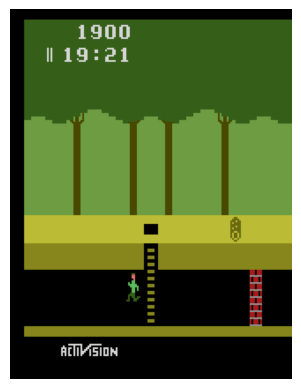

KeyboardInterrupt: 

In [33]:
"""Test Model"""
import time
# Start the game 
state = env_PPO.reset()
done = False
# Loop through the game
while not done: 
    action, _ = model.predict(state)
    state, reward, done, info = env_PPO.step(action)
    frame = env_PPO.render()
    clear_output()
    plt.imshow(frame)
    plt.axis("off")
    plt.show()
    time.sleep(0.01)
    

## **Proximal Policy Optimization (PPO) - costum wrapper**

In [10]:
from gymnasium.wrappers import ResizeObservation

In [49]:
class CustomEnv(gym.Wrapper):
    
    def __init__(self, env): 
        super().__init__(env)
        self.env = env
        self.lives = 3
        
    def step(self, action):
        before_lives = self.lives
        next_state, reward, done,truncated, info = self.env.step(action)
        data = im.fromarray(next_state)
        data.save(f'images/frame{epoch}.png')
        lives = info['lives']
        # intensifies rewards
        if reward < 0 or reward > 0:
            reward *= 10
            
        # losing a life or all lifes is very penalised
        if before_lives > lives:
            reward -= 100000
            done = True
        if lives == 0:
            reward -= 100000 
        self.lives = lives
        return next_state, reward, done,truncated, info 

    

In [50]:
env_test = CustomEnv(ResizeObservation(env,(130,130)))
env_test = GrayScaleObservation(env_test,keep_dim=True)

In [51]:
model.learn(total_timesteps=100000,callback=callback,log_interval=10)

In [ ]:
"""Save Model"""
model.save('model_custom2')

In [ ]:
"""Load Model"""
model = PPO.load('model_custom4.zip',env=env_test)

In [ ]:
"""Test Model"""

# Start the game 
state = env_test.reset()
done = False
# Loop through the game
while not done: 
    action, _ = model.predict(state)
    state, reward, done, info = env_test.step(action)
    frame = env_test.render()
    clear_output()
    plt.imshow(frame)
    plt.axis("off")
    plt.show()
    time.sleep(0.01)

In [ ]:
epoch = 0
num_failed_dropoffs = 0
experience_buffer = []
cum_reward = 0

done = False
min_reward = 0
state = env_test.reset()


while not done:
    action, _ = model.predict(state)

    state, reward, done, _ = env_test.step(action)
    cum_reward += reward
    # Store experience in dictionary
    experience_buffer.append({
        "frame": env_test.render(),
        "episode": 1,
        "epoch": epoch,
        "state": state,
        "action": action,
        "reward": cum_reward,
        }
    )

    if reward == -10:
        num_failed_dropoffs += 1

    epoch += 1

# Run animation and print console output
run_animation(experience_buffer)
store_episode_as_gif(experience_buffer,"animation2.gif")


In [ ]:
actions = [x['action'] for x in experience_buffer]
unique_actions = set()
for a in actions:
    unique_actions.add(a[0])

print(unique_actions)

# **Deep Q Network (DQN) - no modifications**

In [ ]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = 'modelDQN'
            self.model.save(model_path)

        return True

In [ ]:
callback = TrainAndLoggingCallback(check_freq=10000, save_path='.')

In [ ]:
"""Adapt env to return gray pictures and stack 4 frames"""
env.reset()
env_DQN = GrayScaleObservation(env,keep_dim=True)
env_DQN = DummyVecEnv([lambda: env_DQN])
env_DQN = VecFrameStack(env_PPO, 4, channels_order='last')

In [ ]:
"""Create model"""
model = DQN('CnnPolicy', env_DQN, verbose=1, learning_rate=0.00001) 

In [ ]:
"""Train Model"""
model.learn(total_timesteps=100000,callback=callback,log_interval=10,progress_bar=True)

In [ ]:
"""Save Model"""
model.save('model')

In [ ]:
"""Load Model"""
model = PPO.load('model.zip',env=env_DQN)

In [ ]:
"""Test Model"""
import time
# Start the game 
state = env_PPO.reset()
done = False
# Loop through the game
while not done: 
    action, _ = model.predict(state)
    state, reward, done, info = env_PPO.step(action)
    frame = env_PPO.render()
    clear_output()
    plt.imshow(frame)
    plt.axis("off")
    plt.show()
    time.sleep(0.01)
    

## **Deep Q Network (DQN) - custom wrapper**

In [ ]:
from gymnasium.wrappers import ResizeObservation

In [ ]:
class CustomEnv(gym.Wrapper):
    
    def __init__(self, env): 
        super().__init__(env)
        self.env = env
        self.lives = 3
        
    def step(self, action):
        before_lives = self.lives
        next_state, reward, done,truncated, info = self.env.step(action)
        lives = info['lives']
        # intensifies rewards and truncates to the interval [-1,1]
        if reward > 0:
            if((reward *2)<1):
                reward *= 2
            else:
                reward = 1
        elif reward < 0:
            if((reward *2)>-1):
                reward *= 2
            else:
                reward = -1
        

        # losing a life or all lifes is very penalised
        if before_lives > lives:
            reward = -1
            done = True
        if lives == 0:
            reward = -1
        self.lives = lives
        return next_state, reward, done,truncated, info 

In [ ]:
env_custom_DQN = CustomEnv(ResizeObservation(env,(130,130)))
env_custom_DQN = GrayScaleObservation(env_custom_DQN,keep_dim=True)

In [ ]:
env_test.reset()

State space: Box(0, 255, (130, 130, 1), uint8)
Action space: Discrete(18)
Action: 3
Reward: 0.0
State done :False
State truncated :False
State info :{'lives': 3, 'episode_frame_number': 4, 'frame_number': 8}


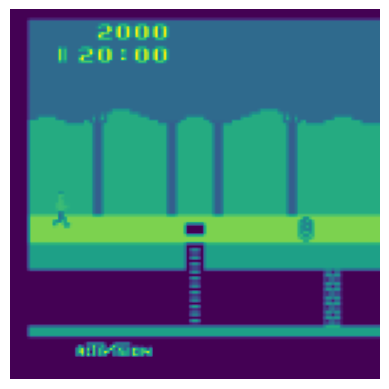

In [13]:
# Print dimensions of state and action space
print("State space: {}".format(env_test.observation_space))
print(f"Action space: {env_test.action_space}")
#print(f"Action space: {env_test.unwrapped.get_action_meanings()}")

# Sample random action
action = 3
print("Action: {}".format(action))
next_state, reward, done,truncated,info = env_test.step(action)

# Print output
print("Reward: {}".format(reward))
print(f"State done :{done}")
print(f"State truncated :{truncated}")
print(f"State info :{info}")

# Render and plot an environment frame
#frame = env.render()
plt.imshow(next_state)
plt.axis("off")
plt.show()

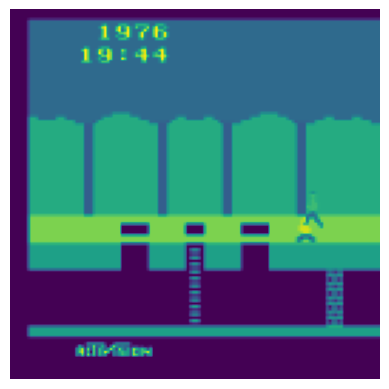

In [56]:
env_test.reset()
done = False
while not done:
    clear_output()
    action = 4
    next_state, reward, done,truncated,info = env_test.step(action)
    plt.imshow(next_state)
    plt.axis("off")
    plt.show()
    time.sleep(0.1)

In [52]:
env_test = DummyVecEnv([lambda: env_test])
env_test = VecFrameStack(env_test, 4, channels_order='last')

In [15]:
print("State space: {}".format(env_test.observation_space))

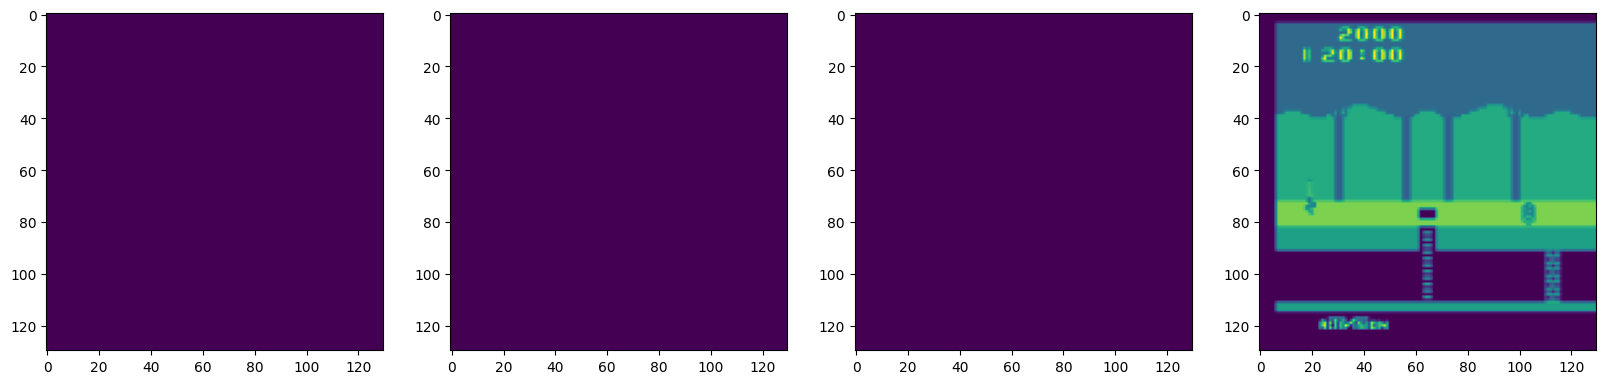

In [16]:
next_state, reward, done,info = env_test.step([action])
plt.figure(figsize=(20,16))
for idx in range(next_state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(next_state[0][:,:,idx])
plt.show()

In [23]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = 'model_custom4'
            self.model.save(model_path)

        return True

In [24]:
callback = TrainAndLoggingCallback(check_freq=10000, save_path='.')

In [19]:
"""Create model"""
model = PPO('CnnPolicy', env_test, verbose=1, learning_rate=0.000001, n_steps=512) 

Using cuda device
Wrapping the env in a VecTransposeImage.


In [28]:
model.learn(total_timesteps=1000000,callback=callback,log_interval=10)

-------------------------------------------
| time/                   |               |
|    fps                  | 102           |
|    iterations           | 10            |
|    time_elapsed         | 50            |
|    total_timesteps      | 5120          |
| train/                  |               |
|    approx_kl            | 0.00017467397 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.99         |
|    explained_variance   | 0.0573        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.000386      |
|    n_updates            | 13570         |
|    policy_gradient_loss | -0.000712     |
|    value_loss           | 0.0417        |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 101          |
|    iterations           | 20           |
|    time_elapsed         | 100     

In [63]:
"""Save Model"""
model.save('model_custom4')

In [15]:
"""Load Model"""
model = PPO.load('model_custom4.zip',env=env_test)

Wrapping the env in a VecTransposeImage.


KeyboardInterrupt: 

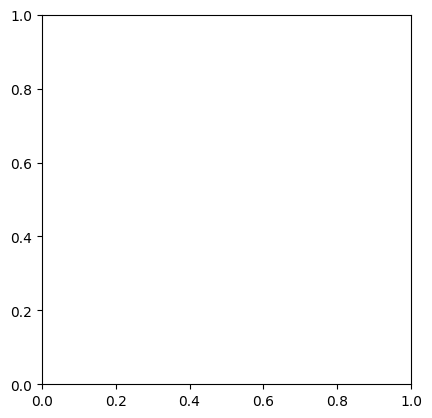

In [19]:
"""Test Model"""

# Start the game 
state = env_test.reset()
done = False
# Loop through the game
while not done: 
    action, _ = model.predict(state)
    state, reward, done, info = env_test.step(action)
    frame = env_test.render()
    clear_output()
    plt.imshow(frame)
    plt.axis("off")
    plt.show()
    time.sleep(0.01)

In [38]:
from PIL import Image as im

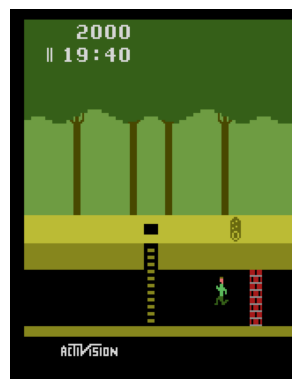

Episode: 1/1
Epoch: 299/299
Action: [8]
Reward: [0.]


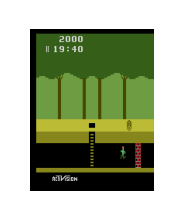

In [53]:
epoch = 0
num_failed_dropoffs = 0
experience_buffer = []
cum_reward = 0

done = False
min_reward = 0
state = env_test.reset()


while not done and epoch < 300:
    action, _ = model.predict(state)

    state, reward, done, _ = env_test.step(action)
    
    
    cum_reward += reward
    # Store experience in dictionary
    experience_buffer.append({
        "frame": env_test.render(),
        "episode": 1,
        "epoch": epoch,
        "state": state,
        "action": action,
        "reward": cum_reward,
        }
    )

    if reward == -10:
        num_failed_dropoffs += 1

    epoch += 1

# Run animation and print console output
run_animation(experience_buffer)
store_episode_as_gif(experience_buffer,"animation2.gif")


In [175]:
actions = [x['action'] for x in experience_buffer]
unique_actions = set()
for a in actions:
    unique_actions.add(a[0])

print(unique_actions)

{8, 17}


# **3. Making costum model**

In [ ]:
!pip install tensorflow

In [7]:
!pip install keras-rl2

                                              0.0/52.1 kB ? eta -:--:--
     --------------                         20.5/52.1 kB 330.3 kB/s eta 0:00:01
     -------------------------------------  51.2/52.1 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 52.1/52.1 kB 536.8 kB/s eta 0:00:00


In [158]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Convolution2D
from tensorflow.keras.optimizers import Adam
from rl.agents import DQNAgent
from rl.memory import SequentialMemory
from rl.policy import LinearAnnealedPolicy

In [173]:
env_c = env
#env_c = GrayScaleObservation(env_c,keep_dim=True)
height, width, channels = env_c.observation_space.shape
actions = env_c.action_space.n

In [162]:
env_c = CustomEnv(env_c)

In [176]:
next_state, reward, done,_,info = env_c.step(action)

# Print output
print(f"Next state: {next_state.shape}")
print(f"State info :{info}")
print(f"State done :{done}")
print("Reward: {}".format(reward))

Next state: (210, 160, 3)
State info :{'lives': 3, 'episode_frame_number': 8, 'frame_number': 28}
State done :False
Reward: 0.0


In [177]:
def build_model(height, width, channels, actions):
    model = Sequential()
    model.add(Convolution2D(32, (8,8), strides=(4,4), activation='relu', input_shape=(3,height, width, channels)))
    model.add(Convolution2D(64, (4,4), strides=(2,2), activation='relu'))
    model.add(Convolution2D(64, (3,3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(actions, activation='linear'))
    return model

In [178]:
model = build_model(height, width, channels, actions)

In [179]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 3, 51, 39, 32)     6176      
                                                                 
 conv2d_28 (Conv2D)          (None, 3, 24, 18, 64)     32832     
                                                                 
 conv2d_29 (Conv2D)          (None, 3, 22, 16, 64)     36928     
                                                                 
 flatten_9 (Flatten)         (None, 67584)             0         
                                                                 
 dense_39 (Dense)            (None, 512)               34603520  
                                                                 
 dense_40 (Dense)            (None, 256)               131328    
                                                                 
 dense_41 (Dense)            (None, 18)               

In [180]:
def build_agent(model, actions):
    policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps', value_max=1., value_min=.1, value_test=.2, nb_steps=10000)
    memory = SequentialMemory(limit=1000, window_length=3)
    dqn = DQNAgent(model=model, memory=memory, policy=policy,
                  enable_dueling_network=True, dueling_type='avg', 
                   nb_actions=actions, nb_steps_warmup=1000
                  )
    return dqn

In [181]:
dqn = build_agent(model, actions)
dqn.compile(Adam(learning_rate=1e-4), metrics=['mae'])

In [182]:
dqn.fit(env_c, nb_steps=10000, visualize=False, verbose=2)

Training for 10000 steps ...


AttributeError: 'int' object has no attribute 'shape'

In [ ]:
scores = dqn.test(env_c, nb_episodes=10, visualize=True)
print(np.mean(scores.history['episode_reward']))